# By Eisha Goel                                                                                                  
# The Sparks Foundation                                                                                    
# Data Science & Business Analytics Intern





# Task-2: Prediction using Unsupervised ML





## Problem Statement: From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

## Solution: For this task I am using K-Means Clustering for predicting the optimum number of clusters and then I am representing it visually.

## Data Source: https://bit.ly/3kXTdox

In [1]:
#Importing the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Reading the data from a .csv file

df = pd.read_csv("C:/Users/Eisha Goel/Desktop/Machine Learning/Iris.csv",header=0)

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.shape

(150, 6)

In [5]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


## Finding the optimum number of clusters for k-means classification

In [6]:
#importing the necessary library for k-means classification

from sklearn.cluster import KMeans

x = df.iloc[:, [0, 1, 2, 3]].values

wcss = []

for i in range(1, 16):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

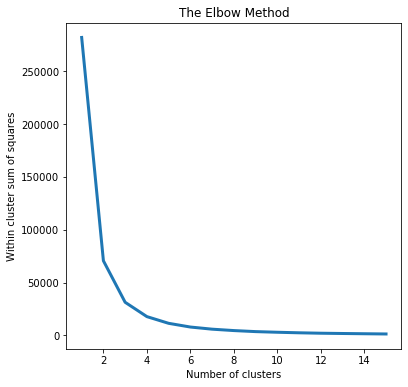

In [7]:
# Plotting the results onto a graph, to observe 'The elbow'

plt.figure(figsize=(6, 6))

plt.plot(range(1, 16), wcss, linewidth= 3)

plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within cluster sum of squares')
plt.show()

#### We can clearly see why it is called 'The elbow method' from the above graph, because the optimum number of clusters is where the elbow occurs. This is when the "Within cluster sum of squares (WCSS)" doesn't decrease significantly with every iteration.

#### So, from the above graph we choose the optimum number of clusters i.e. k=3.

## K-Means Classification

In [8]:
# Applying k-means classification to the dataset

kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

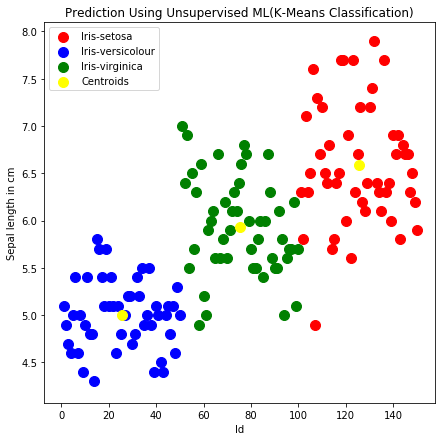

In [9]:
# Visualising the clusters for the first two columns i.e.'Id' and 'Sepal length in cm'

plt.figure(figsize=(7, 7))

plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')


# Plotting the centroids of the clusters

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')
plt.legend()

plt.title('Prediction Using Unsupervised ML(K-Means Classification)')
plt.xlabel('Id')
plt.ylabel('Sepal length in cm')
plt.show()

## Conclusion

### So, We successfully predicted the optimum number of clusters for our given Iris dataset and also represent it visually using K-Means classification. 